# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [1]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ------------- -------------------------- 12.8/39.5 MB 66.9 MB/s eta 0:00:01
   --------------------------- ------------ 27.5/39.5 MB 67.0 MB/s eta 0:00:01
   -------------------------------- ------- 31.7/39.5 MB 55.9 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 52.1 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 44.8 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras

In [ ]:

# train_dir = 'C:/Users/maxi/DATA SCIENCE/REPO_TRABAJO/4-Deep_Learning/2-Redes_Convolucionales/ejercicios/seg_train' 
# test_dir = 'C:/Users/maxi/DATA SCIENCE/REPO_TRABAJO/4-Deep_Learning/2-Redes_Convolucionales/ejercicios/seg_test'    


# train_ds = tf.keras.utils.image_dataset_from_directory(
#     train_dir,
#     labels='inferred',  # Infere las etiquetas de los nombres de las subcarpetas
#     label_mode='int',   # Las etiquetas serán enteros (0, 1, 2, ...)
#     image_size=(32,32),
#     interpolation='nearest', # Puedes cambiar a 'bilinear' si lo prefieres
#     batch_size=32,
#     shuffle=False,      
#     seed=42             # Para reproducibilidad
# )

# test_ds = tf.keras.utils.image_dataset_from_directory(
#     test_dir,
#     labels='inferred',
#     label_mode='int',
#     image_size=(32,32),
#     interpolation='nearest',
#     batch_size=32,
#     shuffle=False,      
#     seed=42
# )


# def normalize_img(image, label):
#     return tf.cast(image, tf.int32) / 255, label

# train_df = train_ds.map(normalize_img)
# test_df = test_ds.map(normalize_img)


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [ ]:
# train_df

<_MapDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [113]:
class_names = ['mountain','street','glacier', 'buildings','sea','forest']

IMAGE_SIZE = (64,64)

In [114]:
#Pasar las clases de string a numeros del 1 al 5
class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [115]:
TRAIN_PATH = 'C:/Users/maxi/DATA SCIENCE/REPO_TRABAJO/4-Deep_Learning/2-Redes_Convolucionales/ejercicios/seg_train'
TEST_PATH = 'C:/Users/maxi/DATA SCIENCE/REPO_TRABAJO/4-Deep_Learning/2-Redes_Convolucionales/ejercicios/seg_test'

In [116]:
def read_data(path, im_size, class_names_label):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path,folder)
        # Iterar sobre todo lo que haya en path
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path,file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, im_size)
            X.append(image)
            y.append(label)
    
    
    return np.array(X), np.array(y)
    

X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

print(X_train.shape)
print(X_test.shape)

(14034, 64, 64, 3)
(3000, 64, 64, 3)


In [117]:
print(y_train.shape)
print(y_test.shape)

(14034,)
(3000,)


In [118]:
y_train

array([3, 3, 3, ..., 1, 1, 1])

In [119]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [120]:
y_train[0:10]

array([3, 1, 1, 4, 0, 2, 0, 0, 3, 1])

In [121]:
pd.DataFrame(y_train).value_counts()

0
0    2512
2    2404
1    2382
4    2274
5    2271
3    2191
Name: count, dtype: int64

In [122]:
X_train.max()

np.uint8(255)

glacier


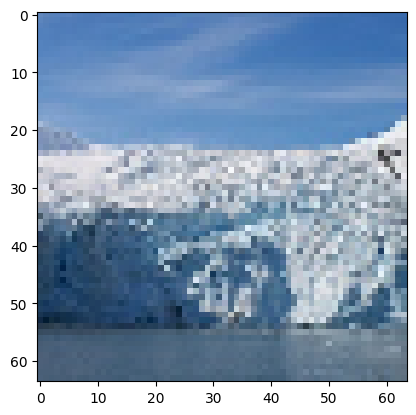

In [123]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index]);

In [124]:
#Escalamos las imagenes
X_train_scal = X_train/ 255
X_test_scal = X_test/ 255

In [125]:
IMAGE_SIZE

(64, 64)

In [126]:
#Miramos si el shape es bueno
print(X_train_scal.shape)
y_train.shape

(14034, 64, 64, 3)


(14034,)

In [127]:
#Queremos hacer un modelo de una conv de 32 y otra de 64, ambas de (3,3) y con activacion relu, el imput_shape es (IMAGE_SIZE[0],IMAGE_SIZE[1],3)
#ambas con un maxpooling (2,2) y despues dos densas, la primera de 128 con activacion relu y la ultima de 6 osn softmax


In [128]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Flatten, MaxPooling2D

In [144]:
model = keras.models.Sequential()

model.add(Conv2D(32, activation='relu', kernel_size=3, input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3), strides=1, padding="same")) #El imput_shape sólo se especifica el la primera "add", 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, activation="relu", kernel_size=3, strides=1, padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, activation="relu", kernel_size=3, strides=1, padding="same"))
model.add(MaxPooling2D(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(200, activation="relu"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(keras.layers.Dense(6, activation="softmax"))

model.compile(optimizer= 'adamw',
            loss= "sparse_categorical_crossentropy",
            metrics=['accuracy'])


model.summary()


c:\Users\maxi\miniconda3\envs\data_analysis_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 200)            │       819,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 902,222 (3.44 MB)

 Trainable params: 902,222 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

In [147]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5", 
                                                save_best_only=True)

history = model.fit(
    X_train_scal,
    y_train,
    batch_size= 200,
    epochs= 50,
    callbacks= [early_stopping_cb,checkpoint_cb],
    validation_split= 0.1,
    
)

Epoch 1/50
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.8182 - loss: 0.5097

64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 212ms/step - accuracy: 0.8184 - loss: 0.5091 - val_accuracy: 0.8077 - val_loss: 0.5677
Epoch 2/50
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.8255 - loss: 0.4854

64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.8259 - loss: 0.4844 - val_accuracy: 0.8298 - val_loss: 0.4940
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.8440 - loss: 0.4283 - val_accuracy: 0.8212 - val_loss: 0.5133
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.8635 - loss: 0.3897 - val_accuracy: 0.8291 - val_loss: 0.5052
Epoch 5/50
63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.8755 - loss: 0.3451

64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - accuracy: 0.8754 - loss: 0.3453 - val_accuracy: 0.8369 - val_loss: 0.4771
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.8915 - loss: 0.3087 - val_accuracy: 0.8212 - val_loss: 0.5399
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.8831 - loss: 0.3144 - val_accuracy: 0.8212 - val_loss: 0.5031
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.9165 - loss: 0.2465 - val_accuracy: 0.8383 - val_loss: 0.5360
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.9155 - loss: 0.2379 - val_accuracy: 0.8056 - val_loss: 0.6440
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.9096 - loss: 0.2575 - val_accuracy: 0.8241 - val_loss: 0.6160


In [150]:
df_hist = pd.DataFrame(history.history)
df_hist

,accuracy,loss,val_accuracy,val_loss
0,0.825812,0.491168,0.807692,0.567693
1,0.839034,0.452756,0.829772,0.493984
2,0.837846,0.441406,0.821225,0.513255
3,0.860966,0.388792,0.829060,0.505163
4,0.875059,0.352731,0.836895,0.477103
5,0.889865,0.311456,0.821225,0.539864
6,0.889470,0.305488,0.821225,0.503110
7,0.911876,0.253479,0.838319,0.535961
8,0.914806,0.235732,0.805556,0.643970
9,0.921299,0.229297,0.824074,0.616043


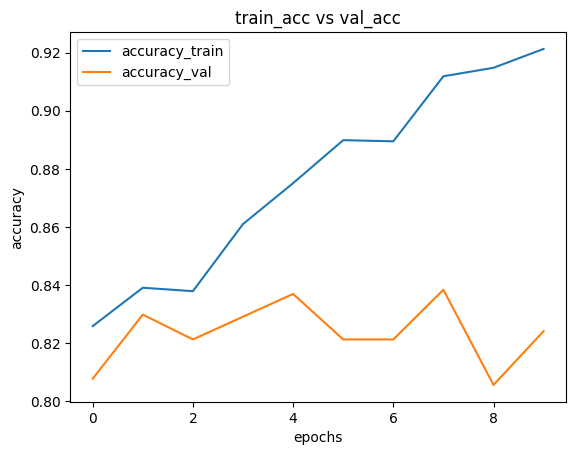

In [151]:
plt.figure()
plt.plot(df_hist['accuracy'], label="accuracy_train")
plt.plot(df_hist['val_accuracy'], label="accuracy_val")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

In [152]:
#Evaluamos el modelo con los datos escalados
results = model.evaluate(X_test_scal, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7978 - loss: 0.7340


In [153]:
predictions = model.predict(X_test)
predictions

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.7981576e-28, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4101312e-35,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [154]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, predictions)
cm

 1/94 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


array([[275,   3, 222,  25,   0,   0],
       [  6, 420,  24,  45,   1,   5],
       [ 33,   4, 505,   8,   2,   1],
       [  6, 102,  29, 299,   0,   1],
       [ 56,  15, 341,  53,  44,   1],
       [  2,  55,  10,  50,   0, 357]])

In [155]:
#Predicciones


In [156]:
#buscar la prediccion buena
pred_labels = 

SyntaxError: invalid syntax (1025959698.py, line 2)

In [157]:
pred_labels

NameError: name 'pred_labels' is not defined

buildings


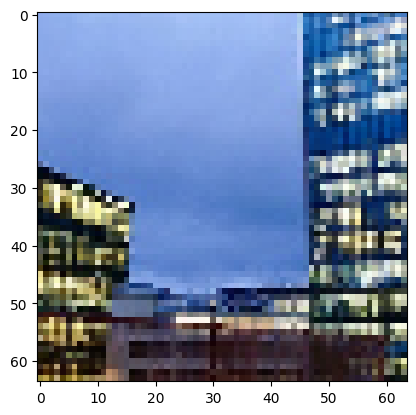

In [158]:
index=3
print(class_names[y_test[index]])
plt.imshow(X_test[index]);

In [159]:
#Sacamos el nombre de etiqueta de alguna prediccion
class_names[pred_labels[index]]

NameError: name 'pred_labels' is not defined

In [160]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [161]:
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [162]:
#Hacemos una matriz de confusion para ver que tal el modelo


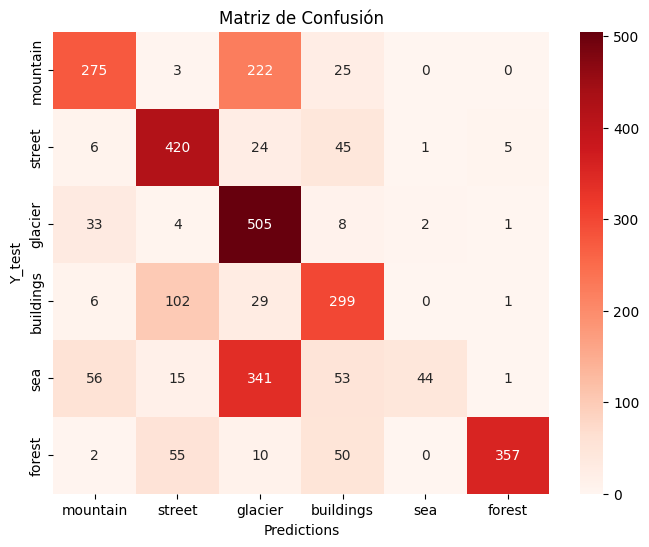

In [163]:
plt.figure(figsize=(8, 6)) 

sns.heatmap(
    cm,
    annot=True,      
    fmt='d',          
    cmap='Reds',        
    xticklabels=class_names, 
    yticklabels=class_names  
)

plt.xlabel('Predictions')
plt.ylabel('Y_test')
plt.title('Matriz de Confusión')
plt.show()

<AxesSubplot:>

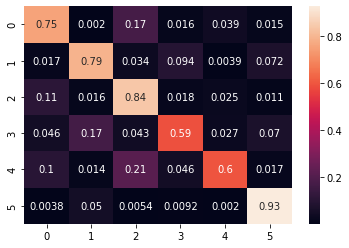

In [85]:
#Hacemos un heatmap para verlo de coloritos la matriz


# Bonus track

## Probad con diferentes modelos y diferentes tamaños de foto (cuidado con no pasaros de tamaño)